# Credit Risk Modelling for Banks

This portfolio project is prepared by Ibtehaj Ali.

### Table of Contents

* [Abstract](#chapter1)
    * [Credit Risk](#section_1_1)
    * [Defining Target Class](#section_1_2)
* [Background](#chapter2)
* [Extracting datasets in Jupyter](#chapter5)
* [Exploratory Analysis](#chapter6)
* [Data Wrangling and Removing Outliers](#chapter7)
* [Feature Engineering](#chapter8)
* [Machine Learning Models](#chapter9)
    * [Logistic Regression](#section_9_1)
    * [Gradient Boosted Trees](#section_9_2)
    * [Comparing both models](#section_9_3)

# Abstract <a class="anchor" id="chapter1"></a>

As an auditor, working with various clients belonging to different sectors of economy, such as financial institutions and
manufacturing organizations, we deal with credit risk on daily basis.
Organisation manages that risk while we analyze that amount recognized in financial statements have incorporated the effects of that credit risk. Therefore, first of all we need to understand what exactly is credit risk.

#### Credit Risk <a class="anchor" id="section_1_1"></a>

Credit risk is the risk of loss due to a borrower not repaying a loan. More specifically, it refers to a lender’s risk of having its cash flows interrupted when a borrower does not pay principal or interest to it.
Let's say we lend money to an individual and we also lend money to government, by purchasing government bonds. With goernment bonds, it is highly unlikely that we would not receive our money back. While in case of an individual, the chances of not receiving our money back is high. That's mean that credit risk of individal is high while the credit risk of government is very much low.
Taking our example forward, in case of individuals or organization with high credit risk, we have to recognized expected credit loss.

#### Definig target class <a class="anchor" id="section_1_2"></a>

Our target class will be loan status, which indicates the credit risk pertains to each loan. The target class is defined as '0' and '1', i.e '0' being good and the '1' being bad loan status.

In Pakistan, banks recognized expeted credit losses using guidelines given in the Prudential regulations issued by State Bank of Pakistan. Practically, banks ranks their credit risk in terms of Obligor Risk Ratings (ORR).Banks ranks each customer based on their features on he basis of the past performances of their customers.

I as a student of Big Data Analytics and data science enthusiast, will analyze credit risk on banking datasets using tools of data science and predict loan status i.e risk ratings, using Machine Learning Algorithm.

# Background <a class="anchor" id="chapter2"></a>

For calculating probablity of default, there are generally two types of data available. First is loan application data which contains information about customer's salary, age, background etc. Secondly, is customers repayment history.
For this project, I will use mix of both types. This is because the both types of data alone will not be as good as combination of both.
The dataset is available on the website of 'Datacamp'.

The dataset used in the project pertains to a financial institution, which provides credit to its customers.
The original dataset contains more than 32,000 entries with 12 categorical /symbolic attributes. In this dataset, each entry represents a person who takes a credit by a bank, his/her age, purpose of the loan, his / income, interest rate, his default status etc.

The attributes are:

•	age

•	income

•	home ownership status

•	employment history

•	purpose of the loan

•	loan grade

•	amount of loan

•	interest rate

•	loan status (Target Class)

•	loan to income percentage

•	default status, and

•	credit history


# Importing Libraries

In [1]:
#Load the librarys
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
#to import plotly
import plotly.offline as py 
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import plotly.tools as tls

# Extracting datasets in Jupyter <a class="anchor" id="chapter5"></a>

In [2]:
df=pd.read_csv('D:\BDA\Project\cr_loan2.csv')

In [3]:
#Searching for Missings,type of data and also known the shape of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [4]:
#Looking unique values
print(df.nunique())
#Looking the data
print(df.head())

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02           

# Exploratory Data Analysis <a class="anchor" id="chapter6"></a>

Let's start looking at target variable i.e loan_staus and their distribution.
I will use both plotly as well as matplotlib.

In [5]:
Count0=df['loan_status'].value_counts()[0]
Count1=df['loan_status'].value_counts()[1]

In [9]:
Count=[Count0,Count1]

In [10]:
labels = ['Good','Bad']

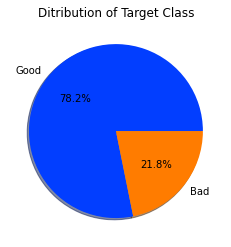

In [11]:
colors = sns.color_palette('bright')[0:20]
#create pie chart
plt.pie(Count, labels = labels ,colors=colors, autopct='%1.1f%%',shadow=True)
plt.title('Ditribution of Target Class')
plt.show()

The first impression of the data shows that 78.2% of the current loan status is good and 22.8% is bad.

In [12]:
#Plotting Housing Ditribution
trace0 = go.Bar(
    x = df[df["loan_status"]== 0]["loan_intent"].value_counts().index.values,
    y = df[df["loan_status"]== 0]["loan_intent"].value_counts().values,
    name='Good'
)

trace1 = go.Bar(
    x = df[df["loan_status"]== 1]["loan_intent"].value_counts().index.values,
    y = df[df["loan_status"]== 1]["loan_intent"].value_counts().values,
    name="Bad"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Loan Intention Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Loan Intent-Grouped')

From the chart above, it seems that Loan intention has no direct relationship with our target class.

In [13]:
#First plot
trace0 = go.Bar(
    x = df[df["loan_status"]== 0]["person_home_ownership"].value_counts().index.values,
    y = df[df["loan_status"]== 0]["person_home_ownership"].value_counts().values,
    name='Good'
)

#Second plot
trace1 = go.Bar(
    x = df[df["loan_status"]== 1]["person_home_ownership"].value_counts().index.values,
    y = df[df["loan_status"]== 1]["person_home_ownership"].value_counts().values,
    name="Bad"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Housing Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Housing-Grouped')

Form the chart above, it can be established that people who are living on rent, have bad loan status i.e high credit risk.

In [14]:
#First plot
trace0 = go.Bar(
    x = df[df["loan_status"]== 0]["loan_grade"].value_counts().index.values,
    y = df[df["loan_status"]== 0]["loan_grade"].value_counts().values,
    name='Good'
)

#Second plot
trace1 = go.Bar(
    x = df[df["loan_status"]== 1]["loan_grade"].value_counts().index.values,
    y = df[df["loan_status"]== 1]["loan_grade"].value_counts().values,
    name="Bad"
)

data = [trace0, trace1]

layout = go.Layout(
    title='Loan Grade Distribuition'
)


fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='Loan Grade-Grouped')

From the above graph, it can also be establised that as the loan grade falls down, the risk of default increases.

In [15]:
df_good = df.loc[df["loan_status"] == 0]['person_age'].values.tolist()
df_bad = df.loc[df["loan_status"] == 1]['person_age'].values.tolist()
df_age = df['person_age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\ProgramData\Anaconda3\lib\site-packages\plotly\tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



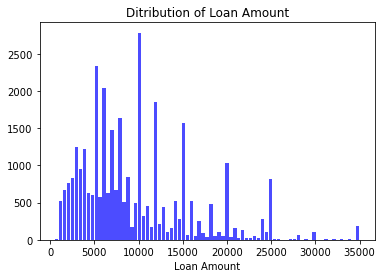

Most people have loan amount between 5,000 to 10,000


In [16]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=df['loan_amnt'], bins='auto', color='blue' ,alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.title('Ditribution of Loan Amount')
plt.show()
print("Most people have loan amount between 5,000 to 10,000")

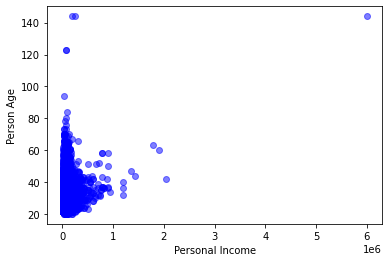

It can be seen that most number of people are of age group between 20 to 40. Furthermore, there are also some outliers in Age and icome columns.


In [17]:
# Plot a scatter plot of income against age
plt.scatter(df['person_income'], df['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Person Age')
plt.show()
print("It can be seen that most number of people are of age group between 20 to 40. Furthermore, there are also some outliers in Age and icome columns.")

In [18]:
import plotly.express as px
import plotly.graph_objects as go
labels = df.iloc[:,4]
values = df.iloc[:,6]
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()
print("The most common purpose of loan is Education and Medical ")

The most common purpose of loan is Education and Medical 


In [19]:
print("Distribution of default by Purpose of loan")
print(pd.crosstab(df['loan_intent'], df['loan_status'], margins = True))

Distribution of default by Purpose of loan
loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [20]:
print("Distribution of default by Grade of loan")
print(pd.crosstab(df['loan_grade'], df['loan_status'], margins = True))

Distribution of default by Grade of loan
loan_status      0     1    All
loan_grade                     
A             9704  1073  10777
B             8750  1701  10451
C             5119  1339   6458
D             1485  2141   3626
E              343   621    964
F               71   170    241
G                1    63     64
All          25473  7108  32581


In [21]:
print("Distribution of default by mean of home ownership, loan status, and average percent income")
print(pd.crosstab(df['person_home_ownership'], df['loan_status'],
                  values=df['loan_percent_income'], aggfunc='mean'))

Distribution of default by mean of home ownership, loan status, and average percent income
loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


Box plot of percentage income by loan status


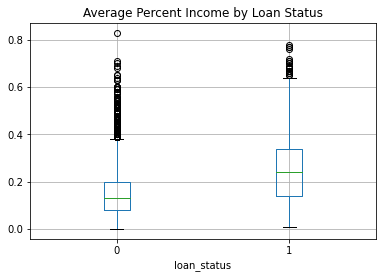

It can be seen that percentage of loan to income has direct effect on rate of default. All the deafulters of loan have the loan to income ratio of above 0.7


In [22]:
print("Box plot of percentage income by loan status")
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()
print("It can be seen that percentage of loan to income has direct effect on rate of default. All the deafulters of loan have the loan to income ratio of above 0.7")

# Data Wrangling and Removing Outliers <a class="anchor" id="chapter7"></a>

#### Removing Outliers <a class="anchor" id="section_7_1"></a>

In [23]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [24]:
#Numbers of outliers can be seen as maximum value in age column can not be 144, similarly employment length can not be 123.

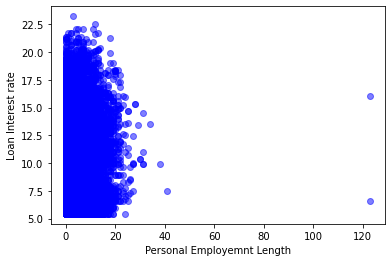

It can be seen that there is outliers in Employment length column as the employment length can not be above 120


In [25]:
# Plot a scatter plot of employemnt length against income rates
plt.scatter(df['person_emp_length'], df['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel('Personal Employemnt Length')
plt.ylabel('Loan Interest rate')
plt.show()
print('It can be seen that there is outliers in Employment length column as the employment length can not be above 120')

In [26]:
# Cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(df['loan_status'],df['person_home_ownership'],
                  values=df['person_emp_length'], aggfunc='max'))
indices = df[df['person_emp_length'] > 60].index

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [27]:
#Dropping the records from the data based on the indices and create a new dataframe
df_new = df.drop(indices)

# Creating the cross table from earlier and include minimum employment length
print(pd.crosstab(df_new['loan_status'],df['person_home_ownership'],
                  values=df['person_emp_length'], aggfunc='min'))

person_home_ownership  MORTGAGE  OTHER  OWN  RENT
loan_status                                      
0                           0.0    0.0  0.0   0.0
1                           0.0    0.0  0.0   0.0


In [28]:
# Creating the cross table from earlier and include maximum employment length
print(pd.crosstab(df_new['loan_status'],df['person_home_ownership'],
                  values=df['person_emp_length'], aggfunc='max'))

person_home_ownership  MORTGAGE  OTHER   OWN  RENT
loan_status                                       
0                          38.0   24.0  31.0  41.0
1                          34.0   11.0  17.0  27.0


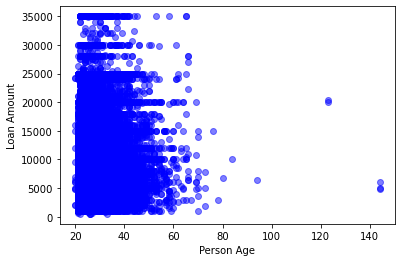

As discussed above, outliers in Age coulmn can be displayed.


In [29]:
# Creating the scatter plot for age and amount
plt.scatter(df['person_age'], df['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()
print('As discussed above, outliers in Age coulmn can be displayed.')

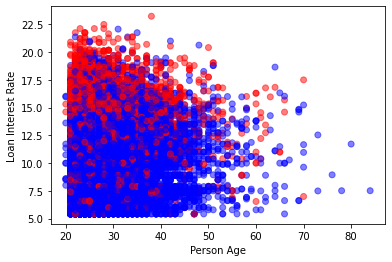

In [30]:
# droppimg the record from the data frame and create a new one
df1_new = df.drop(df[df['person_age'] > 100].index)
import matplotlib

# Creating a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(df1_new['person_age'], df1_new['loan_int_rate'],
            c = df1_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

#### Dealing with Missing Vallues <a class="anchor" id="section_7_1"></a>

In [31]:
# Finding the number of missing values in each columns
null=df.columns[df.isnull().any()]
df[null].isnull().sum()

person_emp_length     895
loan_int_rate        3116
dtype: int64

In [32]:
print("895 values in person_emp_length column and 3116 values in loan_int_rate column is missing. Loan interest rate can be replaced by taking average because it haas relationship with other attributes of the datasets, but person_emp_length can be dropped because it is independent attribute.")

895 values in person_emp_length column and 3116 values in loan_int_rate column is missing. Loan interest rate can be replaced by taking average because it haas relationship with other attributes of the datasets, but person_emp_length can be dropped because it is independent attribute.


In [33]:
#Replacing missing values in "loan_int_rate" Column
df['loan_int_rate'].fillna((df['loan_int_rate'].mean()), inplace =True)

In [34]:
#Dropping missing rows in "person_emp_length" column
indices=df[df['person_emp_length'].isnull()].index
df.drop(indices, inplace = True)

In [35]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [36]:
# All the missing values have been removed.

# Feature Engineering <a class="anchor" id="chapter8"></a>

In [37]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [38]:
#person_home_ownership,loan_intent and loan_grade are non numeric columns.

In [39]:
df['loan_intent'].head()

0     PERSONAL
1    EDUCATION
2      MEDICAL
3      MEDICAL
4      MEDICAL
Name: loan_intent, dtype: object

In [40]:
#Separate the numeric attributes in and saving them in "df_numeric"
df_numeric=df.select_dtypes(exclude=['object'])

In [41]:
df_numeric.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4


In [42]:
#Separate the non-numeric attributes in and saving them in "df_non_numeric"
df_non_numeric = df.select_dtypes(include=['object'])

In [43]:
df_non_numeric.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y


In [44]:
#one_hot encoding the non-numeric data
df_onehot = pd.get_dummies(df_non_numeric)

In [45]:
df_onehot.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [46]:
# Concatenating both
df_clean = pd.concat([df_numeric,df_onehot], axis=1)

In [47]:
df_clean.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


# Machine Learning Models <a class="anchor" id="chapter9"></a>

In [57]:
#Separate the target class i.e "loan_status from remaining dataset"
X=df_clean.drop('loan_status', axis=1)
Y=df_clean['loan_status']

#### Logistic Regression <a class="anchor" id="section_9_1"></a>

In [58]:
#Importing Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [72]:
# Print the parameters of the model
trainX, testX,trainY, testY = train_test_split(X,Y,test_size=0.3,random_state=42)

In [73]:
LogR = LogisticRegression(max_iter=500)

In [74]:
LogR.fit(trainX,np.ravel(trainY))

LogisticRegression(max_iter=500)

In [75]:
# test data prediction
predictLogR = LogR.predict(testX)

In [76]:
model_LR=LogisticRegression()

In [68]:
print(confusion_matrix(testY, predictLogR))

[[7378  119]
 [1672  337]]


In [77]:
print(accuracy_score(testY,predictLogR))
predictLogT = LogR.predict(trainX)
print(accuracy_score(trainY,predictLogT))

0.8115926783084367
0.806311992786294


In [78]:
target_names = ['Non-Default', 'Default']
print(classification_report(testY,predictLogR, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.82      0.98      0.89      7497
     Default       0.74      0.17      0.27      2009

    accuracy                           0.81      9506
   macro avg       0.78      0.58      0.58      9506
weighted avg       0.80      0.81      0.76      9506



0.8115926783084367


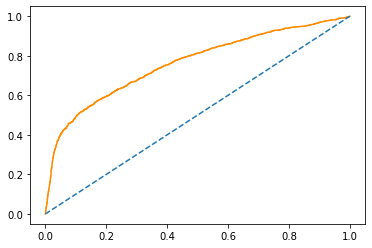

In [79]:
# Create predictions and store them in a variable
preds = LogR.predict_proba(testX)

# Print the accuracy score the model
print(LogR.score(testX, testY))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(testY, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

#### Logistic Gradient boosted trees <a class="anchor" id="section_9_2"></a>

In [80]:
# Importing Gradient boosted trees
from sklearn.ensemble import GradientBoostingClassifier as xgb

In [81]:
# Train a model
Log_gbt = xgb().fit(trainX, np.ravel(trainY))

# Predict with a model
gbt_preds = Log_gbt.predict_proba(testX)

In [82]:
# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = testY.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            0      0.039058
1            0      0.101252
2            0      0.084389
3            0      0.043455
4            0      0.159964


In [83]:
# Predict the labels for loan status
gbt_preds = Log_gbt.predict(testX)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(testY, gbt_preds, target_names=target_names))

[0 0 0 ... 1 0 0]
              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      7497
     Default       0.95      0.72      0.82      2009

    accuracy                           0.93      9506
   macro avg       0.94      0.85      0.89      9506
weighted avg       0.93      0.93      0.93      9506



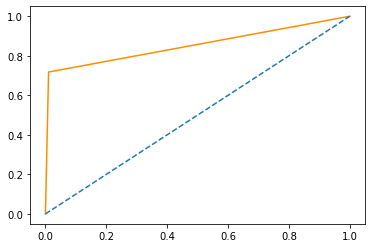

In [84]:
prob_default2 = gbt_preds
fallout, sensitivity, thresholds = roc_curve(testY, prob_default2)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

#### Comparing both models <a class="anchor" id="section_9_3"></a>

In [85]:
# Print the classification report of Logistic Regression
target_names = ['Non-Default', 'Default']
print(classification_report(testY,predictLogR, target_names=target_names))

# Print the classification report of Gradient Boosted trees
target_names = ['Non-Default', 'Default']
print(classification_report(testY, gbt_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.82      0.98      0.89      7497
     Default       0.74      0.17      0.27      2009

    accuracy                           0.81      9506
   macro avg       0.78      0.58      0.58      9506
weighted avg       0.80      0.81      0.76      9506

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      7497
     Default       0.95      0.72      0.82      2009

    accuracy                           0.93      9506
   macro avg       0.94      0.85      0.89      9506
weighted avg       0.93      0.93      0.93      9506



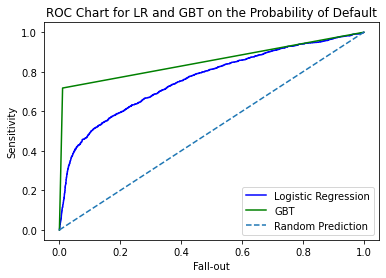

In [86]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(testY, prob_default)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(testY, prob_default2)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

# Conclusion <a class="anchor" id="chapter10"></a>

The results from both the models are presented in the form of classification report. The accuracy of Logistic Regression is 81% while the accuracy of Gradient boosted tree is 93%. 